# Weather Forecasting Using Machine Learning

### Group members:
- Yasoob Raza (CS-109)
- Hassan Mehdi (CS-120)
- Usman Yousuf (CS-099)

## Load necessary modules and dataset

in case imblearn is not already installed uncomment and run the cell below 

In [1]:
# ! pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings

# Turn off warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("weatherHistory.csv")
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

## Exploratory Analysis and Pre-processing

In [4]:
# Renaming columns for convenience
df.rename(columns={
            'Formatted Date':"Date",
            'Temperature (C)':"Temperature",
            'Apparent Temperature (C)':"Apparent Temp",
            'Wind Speed (km/h)':"Wind Speed",
            'Wind Bearing (degrees)':"Wind Bearing",
            'Visibility (km)':"Visibility",
            'Loud Cover':"Cloud Cover",
            'Pressure (millibars)':"Pressure"},
            inplace=True)
df.columns

Index(['Date', 'Summary', 'Precip Type', 'Temperature', 'Apparent Temp',
       'Humidity', 'Wind Speed', 'Wind Bearing', 'Visibility', 'Cloud Cover',
       'Pressure', 'Daily Summary'],
      dtype='object')

In [5]:
# displaying basic description of dataset and number of null values in it  
desc=df.describe(include="all").T
null = df.isnull().sum()
desc.insert(0,"null values",null)
desc.T

Date        Summary Precip Type  \
null values                              0              0         517   
count                                96453          96453       95936   
unique                               96429             27           2   
top          2010-08-02 00:00:00.000 +0200  Partly Cloudy        rain   
freq                                     2          31733       85224   
mean                                   NaN            NaN         NaN   
std                                    NaN            NaN         NaN   
min                                    NaN            NaN         NaN   
25%                                    NaN            NaN         NaN   
50%                                    NaN            NaN         NaN   
75%                                    NaN            NaN         NaN   
max                                    NaN            NaN         NaN   

            Temperature Apparent Temp  Humidity Wind Speed Wind Bearing  \
null values           0             0         0          0            0   
count           96453.0       96453.0   96453.0    96453.0      96453.0   
unique              NaN           NaN       NaN        NaN          NaN   
top                 NaN           NaN       NaN        NaN          NaN   
freq                NaN           NaN       NaN        NaN          NaN   
mean          11.932678     10.855029  0.734899   10.81064   187.509232   
std            9.551546     10.696847  0.195473   6.913571   107.383428   
min          -21.822222    -27.716667       0.0        0.0          0.0   
25%            4.688889      2.311111       0.6     5.8282        116.0   
50%                12.0          12.0      0.78     9.9659        180.0   
75%           18.838889     18.838889      0.89    14.1358        290.0   
max           39.905556     39.344444       1.0    63.8526        359.0   

            Visibility Cloud Cover     Pressure  \
null values          0           0            0   
count          96453.0     96453.0      96453.0   
unique             NaN         NaN          NaN   
top                NaN         NaN          NaN   
freq               NaN         NaN          NaN   
mean         10.347325         0.0  1003.235956   
std           4.192123         0.0   116.969906   
min                0.0         0.0          0.0   
25%             8.3398         0.0       1011.9   
50%            10.0464         0.0      1016.45   
75%             14.812         0.0      1021.09   
max               16.1         0.0      1046.38   

                                 Daily Summary  
null values                                  0  
count                                    96453  
unique                                     214  
top          Mostly cloudy throughout the day.  
freq                                     20085  
mean                                       NaN  
std                                        NaN  
min                                        NaN  
25%                                        NaN  
50%                                        NaN  
75%                                        NaN  
max                                        NaN

the dataset contains datewise readings of weather details. From above table we can see that total data count is greater than unique values for dates column which shows that the data contains duplicates. also we can see that all the null values present in the dataset are in column "Precip Type", Since the column does not apear to be as important feature therefore the Whole column can be droped.

In [6]:
df.drop_duplicates(inplace=True)
df.drop("Precip Type",axis=1,inplace=True)

- removing all irrelevant columns such as **"Date"** and **"Daily Summary"**

- removing **"Cloud Cover"** since it has only 1 unique value for all instances and does not help in identifying target variable

- by using domain knowledge we know that direction of winds does not contribute much to identify the weather therefore also removing **"Wind Bearing"** column from the dataset  

In [7]:
df.drop(["Date","Daily Summary","Cloud Cover","Wind Bearing"],axis=1,inplace=True)
df

Summary  Temperature  Apparent Temp  Humidity  Wind Speed  \
0      Partly Cloudy     9.472222       7.388889      0.89     14.1197   
1      Partly Cloudy     9.355556       7.227778      0.86     14.2646   
2      Mostly Cloudy     9.377778       9.377778      0.89      3.9284   
3      Partly Cloudy     8.288889       5.944444      0.83     14.1036   
4      Mostly Cloudy     8.755556       6.977778      0.83     11.0446   
...              ...          ...            ...       ...         ...   
96448  Partly Cloudy    26.016667      26.016667      0.43     10.9963   
96449  Partly Cloudy    24.583333      24.583333      0.48     10.0947   
96450  Partly Cloudy    22.038889      22.038889      0.56      8.9838   
96451  Partly Cloudy    21.522222      21.522222      0.60     10.5294   
96452  Partly Cloudy    20.438889      20.438889      0.61      5.8765   

       Visibility  Pressure  
0         15.8263   1015.13  
1         15.8263   1015.63  
2         14.9569   1015.94  
3         15.8263   1016.41  
4         15.8263   1016.51  
...           ...       ...  
96448     16.1000   1014.36  
96449     15.5526   1015.16  
96450     16.1000   1015.66  
96451     16.1000   1015.95  
96452     15.5204   1016.16  

[96429 rows x 7 columns]

before analysing the remaining features through graphs and plots we would like to reduce our data and keep the instances/data of those classes that we want our model to predict. for this we are choosing summary classes **Clear**,**Foggy** and **Overcast** and droping all the remaining classes

In [8]:
classes= ['Clear','Foggy','Overcast']
df = df[df["Summary"].isin(classes)]
df["Summary"].value_counts()

Overcast    16597
Clear       10873
Foggy        7148
Name: Summary, dtype: int64

analysing the remaining features through graphs and plots

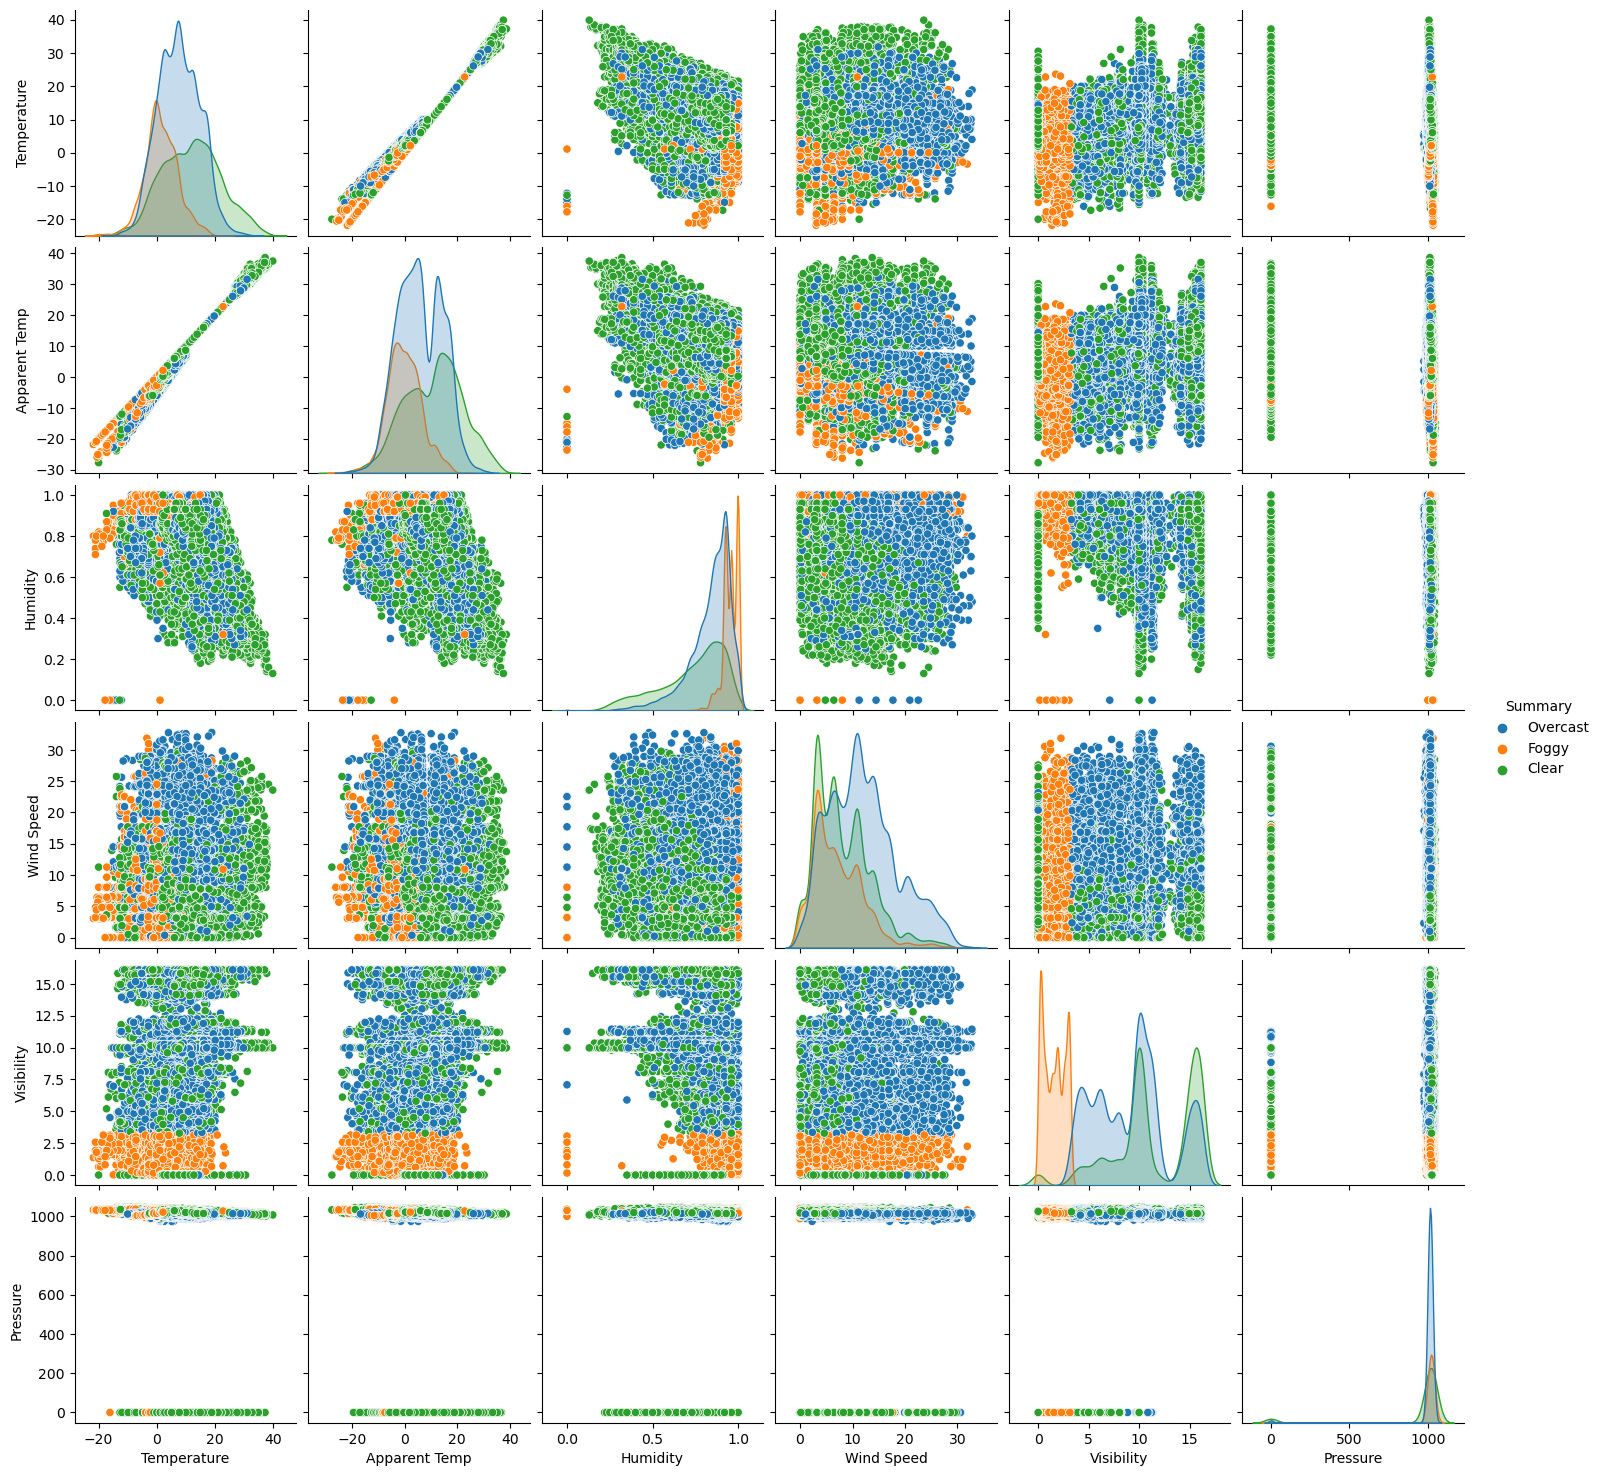

In [9]:
sns.pairplot(data=df,hue="Summary")
plt.show()

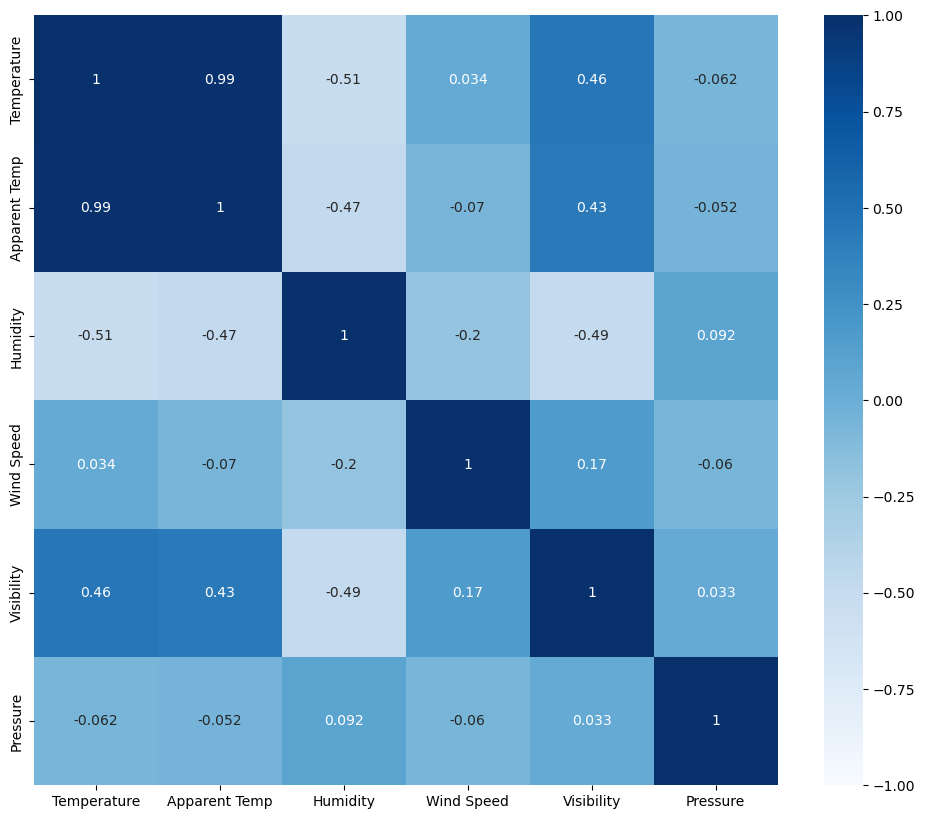

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.iloc[:,1:].corr(), annot=True,vmin=-1, vmax=1,cmap="Blues")
plt.show()

**The above Heatmap and scatterplots show correlations between all the features**

from above plots we can conclude following results   

- The variables **"Temperature"** and **"Apparent Temp"** are highly correlated and may lead to multicollinearity therefore we can drop any one of the features in order to reduce the dimensions of the feature set.in this case based on our own domain knowledge we are droping **"Apparent temp"**.


- The variables **"Temperature"** and **"Humidity"** have moderate negative correlation. but from the domain knowledge we know that humidity can be important feature in determining weather therefore considering this correlation to be insignificant 


- We can see that we have outliers in our dataset mostly in **"Pressure"** and **"Humidity"** which should be removed 


- We can also from the KDEplot of **"Pressure"** that the pressure values for all **"Summary"** classes  are same and there for we can conclude that pressure would not be a much helpful feature in predicting the Summary


In [11]:
df= df.drop(["Pressure","Apparent Temp"],axis=1)
df

Summary  Temperature  Humidity  Wind Speed  Visibility
46     Overcast    14.422222      0.58     20.0123     15.8263
47     Overcast    14.255556      0.59     16.5025     14.9569
48     Overcast    13.772222      0.60     17.0982     15.8263
49     Overcast    13.283333      0.63     14.3612     15.8263
50     Overcast     8.633333      0.87     22.0409      6.6976
...         ...          ...       ...         ...         ...
96432     Clear    15.594444      0.87      3.2844     15.4399
96433     Clear    15.011111      0.93      3.2039     15.8263
96434     Clear    15.016667      0.90      2.7048     14.9569
96435     Clear    13.872222      0.93      4.7495     15.8263
96436     Clear    16.072222      0.88      2.7853     15.7297

[34618 rows x 5 columns]

using scatter plots for finding outliers in the dataset. since in this case each summary class has its own distribution therefore finding outliers by considering the whole feature such as "Temperature", "Humidity " e.t.c as a single distribution would be wrong. therefore using boxplot to find outliers in each of the Summary class instead.  

In [12]:
df.reset_index(drop=True,inplace=True)
df[df["Summary"]=="Foggy"]

Summary  Temperature  Humidity  Wind Speed  Visibility
9       Foggy    10.911111      0.86     22.3951      2.6565
10      Foggy     8.800000      0.99     26.5006      2.6565
15      Foggy     8.200000      0.96     20.4470      3.1073
16      Foggy     8.177778      0.93     27.8691      3.2039
50      Foggy     5.211111      0.92      4.7656      1.2236
...       ...          ...       ...         ...         ...
34465   Foggy    13.144444      0.99      3.2039      2.2218
34466   Foggy    13.822222      0.94      4.8300      1.9642
34467   Foggy    13.872222      0.94      3.2039      1.9803
34488   Foggy    14.905556      1.00      7.5992      1.6100
34568   Foggy    22.800000      0.32     10.9158      0.7245

[7148 rows x 5 columns]

In [13]:
# defining function to plot and visualize the outliers in dataset

def OutliersPlot(data,class_name):
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)

    # Define lower and upper thresholds as a multiple of IQR
    threshold_lower = 1.5
    threshold_upper = 1.5

    # Identify outliers
    outliers = np.where((data < Q1 - threshold_lower * (Q3 - Q1)) | (data > Q3 + threshold_upper * (Q3 - Q1)))[0]

    # Create scatter plot
    plt.figure(figsize=(10,3))
    plt.scatter(range(len(data)), data,color='grey', label='Data',alpha=0.3)
    plt.scatter(outliers, data[outliers], color='r', label='Outliers',alpha=0.3)
    plt.axhline(Q2, color='g', linestyle='--',linewidth=2, label='Median')
    plt.fill_between(range(len(data)), Q1, Q2, alpha=0.3, color='blue', label='Q1-Q2')
    plt.fill_between(range(len(data)), Q2, Q3, alpha=0.3, color='green', label='Q2-Q3')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.suptitle(class_name, fontsize=12, fontweight='bold')
    plt.subplots_adjust(top=0.8)
    plt.title(data.name)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()


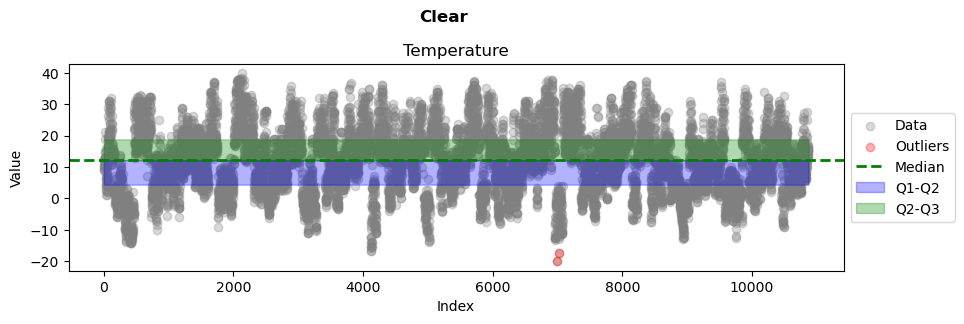

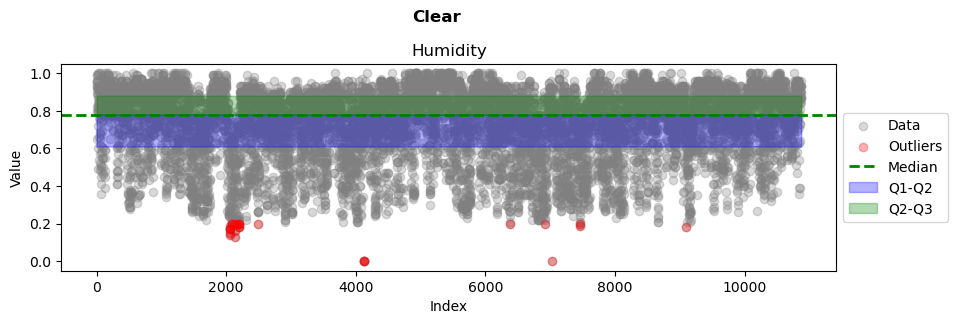

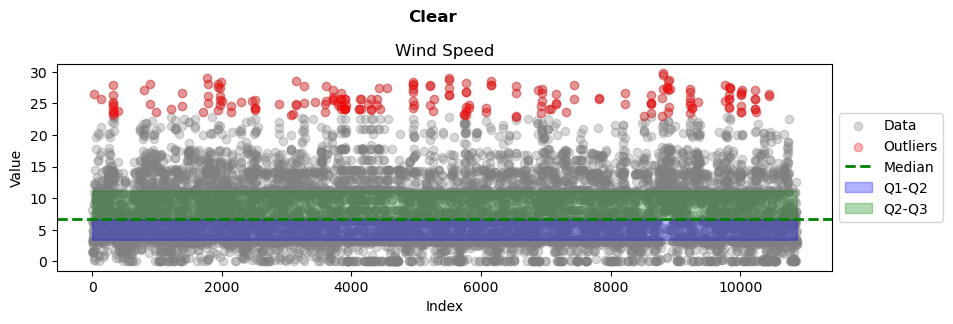

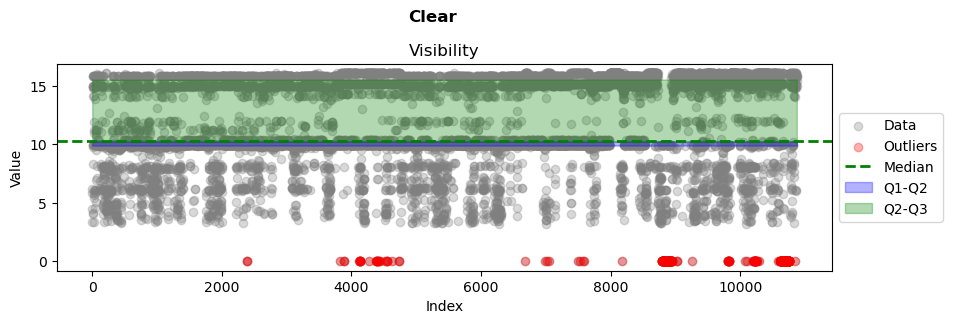

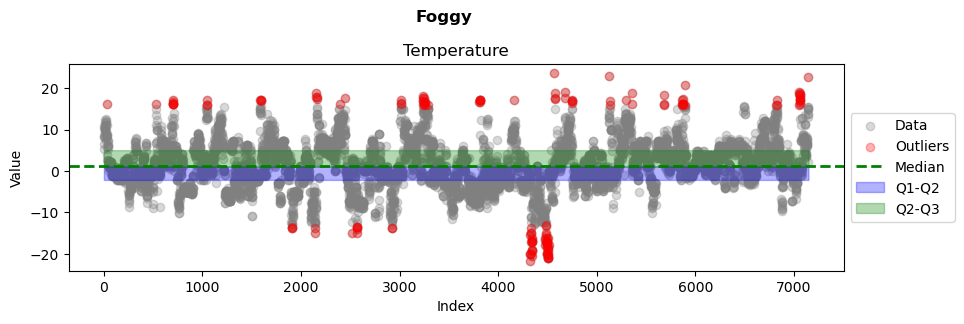

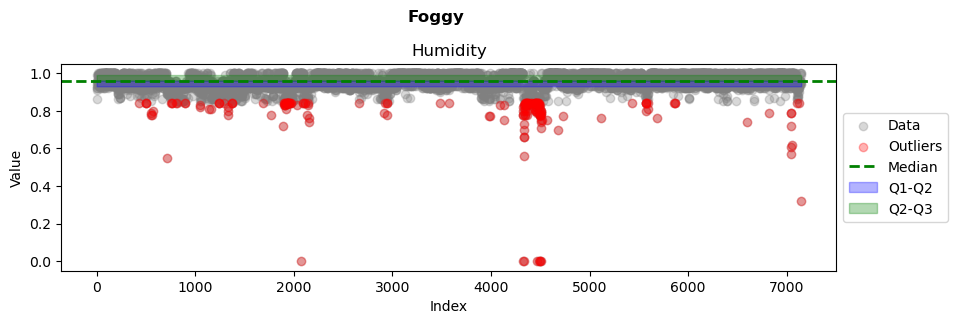

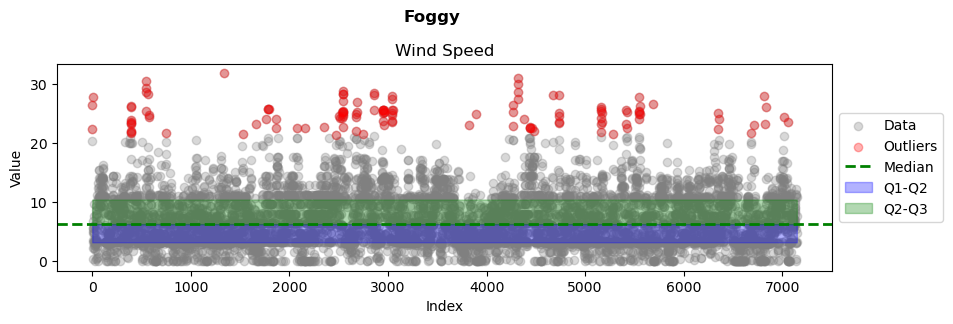

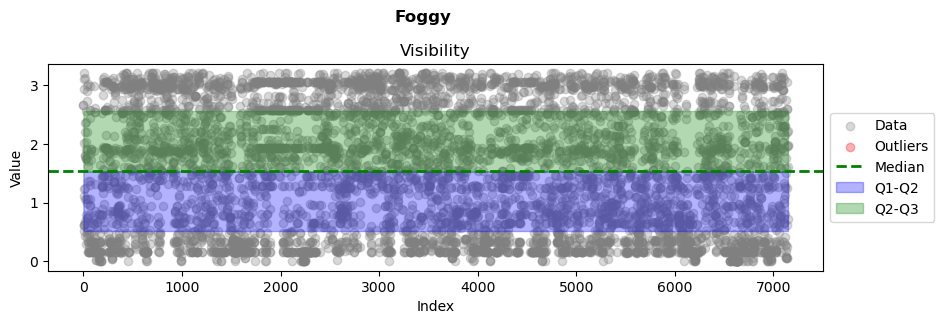

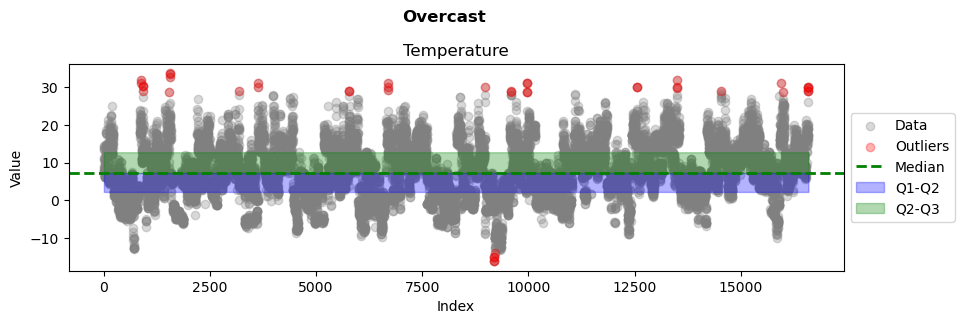

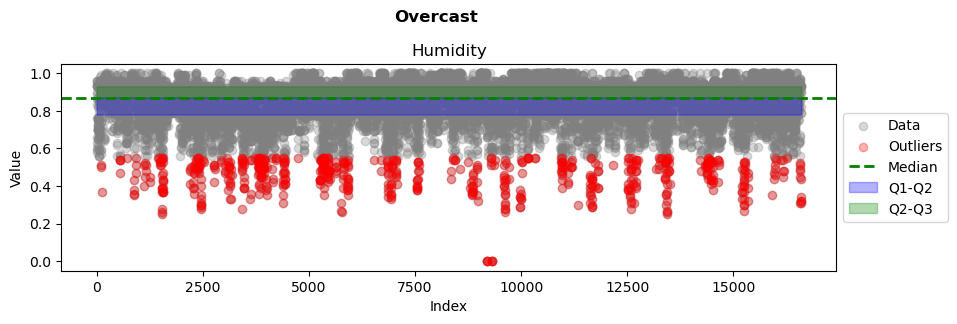

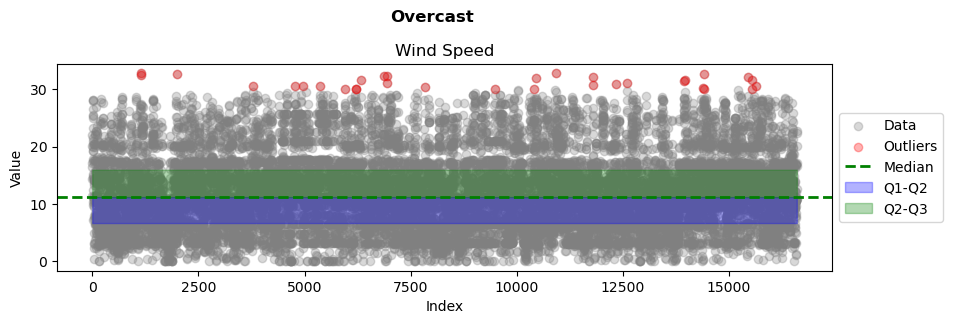

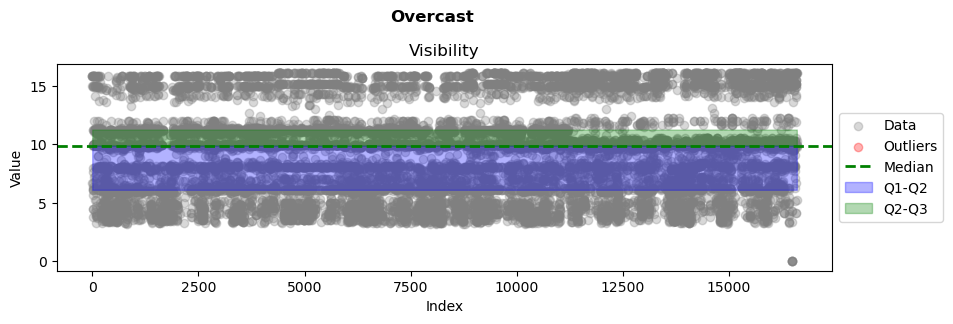

In [14]:
#  visualizing outliers
groups = df.groupby("Summary")
for class_name, group_data in groups:
    for i in ['Temperature', 'Humidity', 'Wind Speed', 'Visibility']:
        OutliersPlot(group_data[i].reset_index(drop=True),class_name)
        
        

From the above Plots we can see that there are a few outliers that we need to remove in order to remove outliers we are using **"Interquartile Ranges"** with a value of **k = 1.5** (k is used to find the upper and lower boundaries out of which any data will be considered Outlier)

- lower_bound = Q1 - k * IQR
- upper_bound = Q3 + k * IQR


see resource link for further details on [Outlier Detection using IQR](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

In [15]:
#creating function to remove Outliers using IQR

def remove_outliers_iqr(data, feature, target):
    groups = data.groupby(target)

    filtered_data = pd.DataFrame(columns=data.columns)

    for class_name, group_data in groups:
        # Calculate the quartiles
        Q1 = group_data[feature].quantile(0.25)
        Q3 = group_data[feature].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Determine the lower and upper boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the group data 
        filtered_group_data = group_data[
            (group_data[feature] >= lower_bound) & (group_data[feature] <= upper_bound)
        ]

        # Concatenate the filtered group data to the overall filtered data
        filtered_data = pd.concat([filtered_data, filtered_group_data])

    return filtered_data

the function takes dataframe, one of its features and the target variable with multipleclasses as arguments 
the function first divides dataframe into multiple subsets with respect to summary class and then remove outliers 
in each of the class's distributions. then the function concatenate all the filtered data groups and return a filtered dataframe 


In [16]:
for i in df.columns[1:]:
    df=remove_outliers_iqr(df, i, 'Summary')

In [17]:
#filtered Dataframe
filtered_data = df

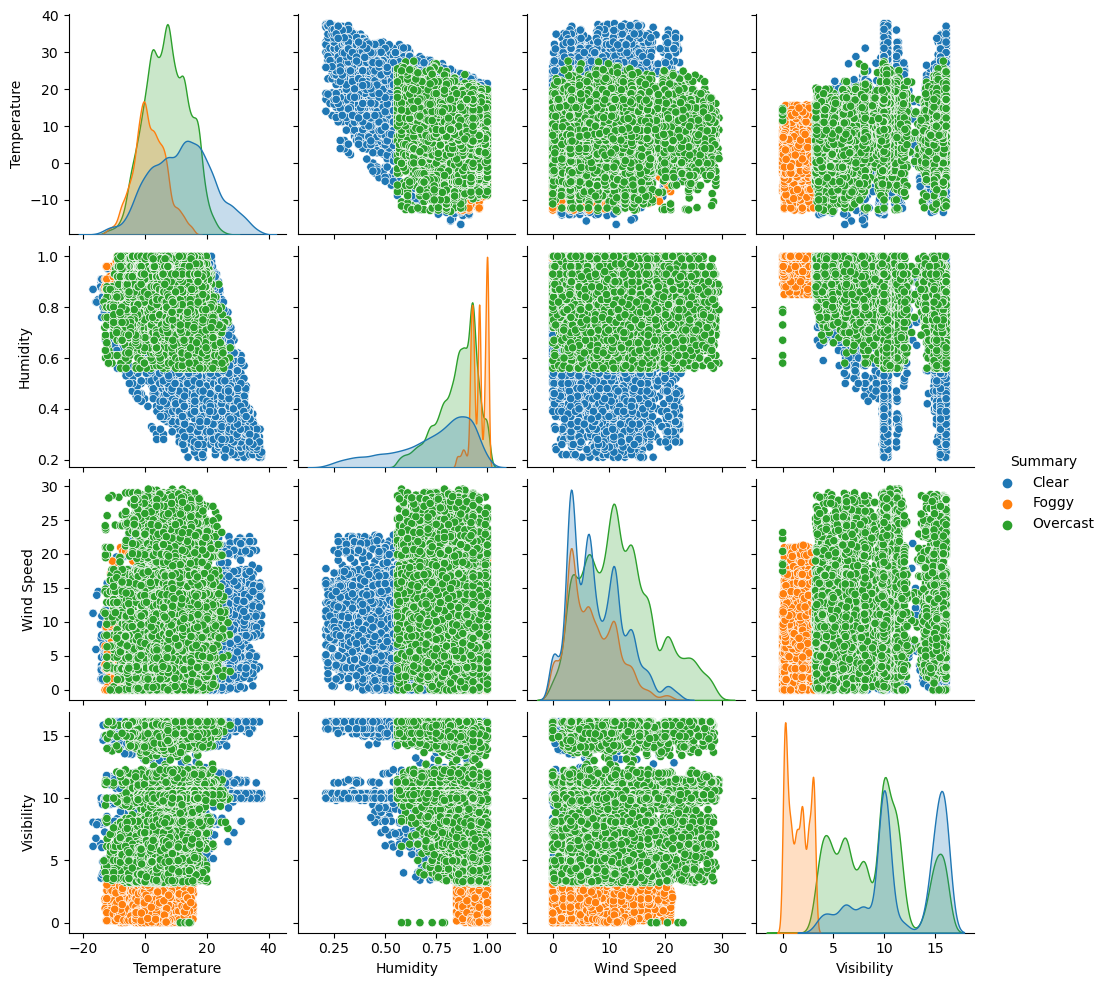

In [18]:
# visualizing filtered data
sns.pairplot(data=filtered_data,hue="Summary")
plt.show()

from the above plots we can see that there are still some outliers in **"Visibility"**. removing these outliers manually


In [19]:
filtered_data=filtered_data[(filtered_data["Visibility"]>0)]
# filtered_data

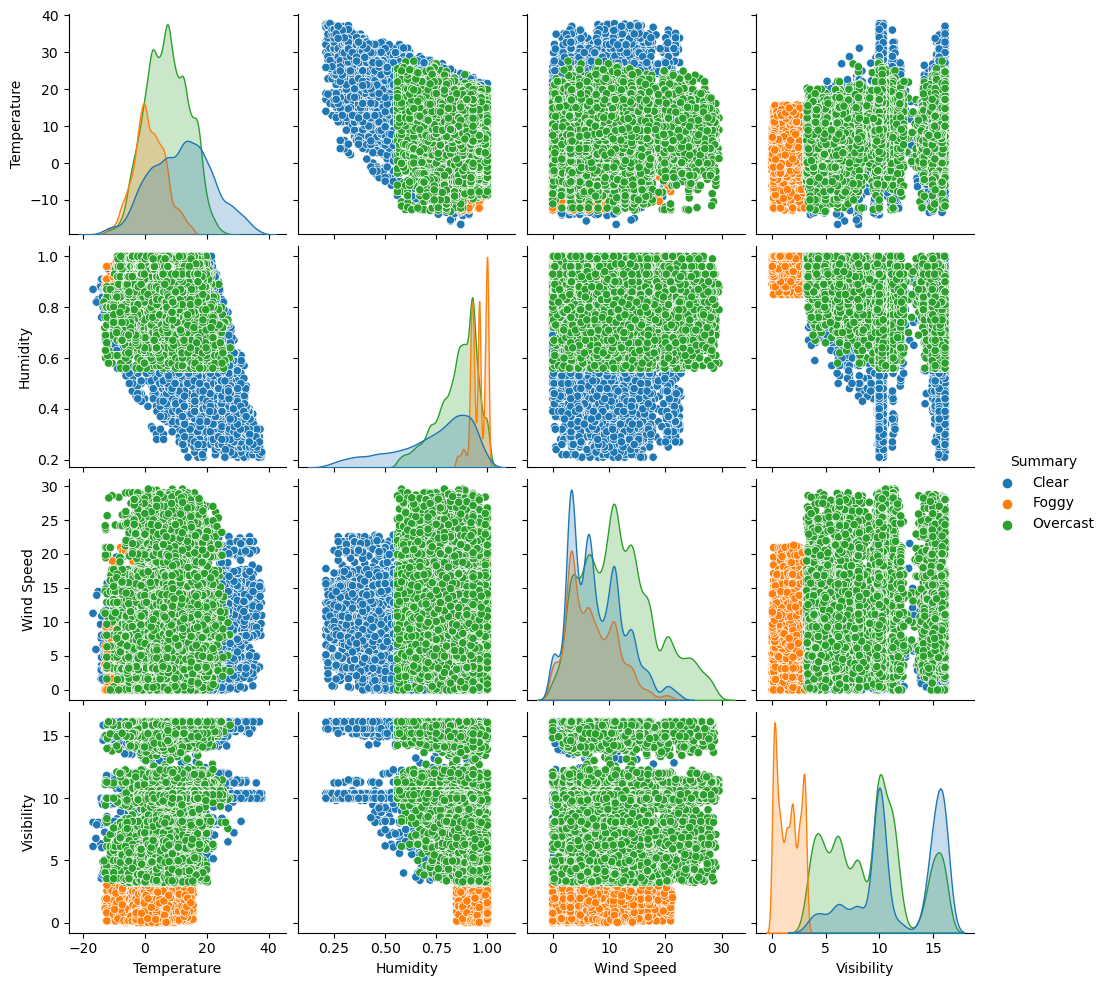

In [20]:
sns.pairplot(data=filtered_data,hue="Summary")
plt.show()

till now PreProcessing has been completed and now saving our cleaned dataset in csv format with file name : **cleaned.csv**

In [21]:
# filtered_data.to_csv("cleaned1.csv",index=False)
df=filtered_data

## Resampling and Normalization of Data

In [22]:
# dividing data set into features and target before normalization
features= df.iloc[:,1:]
target=df.iloc[:,0]

In [23]:
# performing normailization on data
features=MinMaxScaler().fit_transform(features)

Since we know that our data contains imbalanced classes we have to resample our data to balance the classes.for this we are under sampling the data using **"Tomek Links"** and then we will perform oversampling using **"SMOTE"** 

for further description about Tomek Links and SMOTE you can visit the reference links below
-  [**"Tomek Links"**](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
-  [**"SMOTE"**](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

its importanat to note that we perform these upsampling and downsampling techniques only on the training data, while keeping the original imbalanced dataset for evaluation purposes.

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.30,random_state=42)
X_val,X_test,Y_val,Y_test=train_test_split(X_test,Y_test,test_size=0.50,random_state=42)

X_train.shape,X_val.shape,X_test.shape

((23072, 4), (4944, 4), (4944, 4))

Note that we have divided the dataset into three parts
- Training dataset 70%
- validation dataset 15%
- Testing dataset 15%

In [25]:
# undersampling
tomek=TomekLinks(sampling_strategy="all",)
X_train,Y_train = tomek.fit_resample(X_train,Y_train)

# oversampling
smote=SMOTE(sampling_strategy="all",random_state=42,k_neighbors=3)
X_train,Y_train = smote.fit_resample(X_train,Y_train)

Y_train.value_counts()

Clear       9923
Overcast    9923
Foggy       9923
Name: Summary, dtype: int64

now we are done with sampling our data can use the training data set to train the models

## Model Training and Evaluation

we will be training our models using three algorithms
- non-parametric algorithm **(K Nearest Neighbor)**
- parametric shallow algorithm **(Logistic Regression)**
- neuralnetwork architecture **(Multi Layer Perceptron)**

Note that we will be using Hold out method for HyperParameters selection and Model Evaluation. given below is reference link for further details 

[**"Hold-out method for Model Evaluation and Selection"**](https://vitalflux.com/hold-out-method-for-training-machine-learning-model/)

# Non-parametric algorithm **(K Nearest Neighbor)**

## model 1

In [26]:
%%capture
# Hyperparameter n_neighbours
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,Y_train)
knn1_pred = knn1.predict(X_val)

In [27]:
%%capture
train_accuracy = knn1.score(X_train,Y_train)
test_accuracy = knn1.score(X_val,Y_val)
precision = precision_score(Y_val, knn1_pred,average='macro')
recall = recall_score(Y_val, knn1_pred,average='macro')
f1score = f1_score(Y_val, knn1_pred,average='macro')
knn1_data = {
    'neighbors':3,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [28]:
knn1_data

{'neighbors': 3,
 'Train Accuracy': 0.9604958177970372,
 'Test Accuracy': 0.8060275080906149,
 'Precision': 0.8242033488010753,
 'Recall': 0.8352116778277351,
 'F1-Score': 0.8289552076068926}

## model 2

In [29]:
%%capture
# Hyperparameter n_neighbours
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train,Y_train)
knn2_pred = knn2.predict(X_val)

In [30]:
%%capture
train_accuracy = knn2.score(X_train,Y_train)
test_accuracy = knn2.score(X_val,Y_val)
precision = precision_score(Y_val, knn2_pred,average='macro')
recall = recall_score(Y_val, knn2_pred,average='macro')
f1score = f1_score(Y_val, knn2_pred,average='macro')
knn2_data= {
    'neighbors':5,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [31]:
knn2_data

{'neighbors': 5,
 'Train Accuracy': 0.9372837515536296,
 'Test Accuracy': 0.8074433656957929,
 'Precision': 0.8236555254441432,
 'Recall': 0.836784434754957,
 'F1-Score': 0.8293624901267723}

## model 3

In [32]:
%%capture
# Hyperparameter n_neighbours
knn3=KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train,Y_train)
knn3_pred = knn3.predict(X_val)

In [33]:
%%capture
train_accuracy = knn3.score(X_train,Y_train)
test_accuracy = knn3.score(X_val,Y_val)
precision = precision_score(Y_val, knn3_pred,average='macro')
recall = recall_score(Y_val, knn3_pred,average='macro')
f1score = f1_score(Y_val, knn3_pred,average='macro')
knn3_data= {
    'neighbors':7,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [34]:
knn3_data

{'neighbors': 7,
 'Train Accuracy': 0.9252914105277302,
 'Test Accuracy': 0.8104773462783171,
 'Precision': 0.8250182652290617,
 'Recall': 0.8411334271310752,
 'F1-Score': 0.831847411993607}

## Models Evaluation

ploting Heatmaps to visualize the confusion matrix inorder to better understand the models performance

In [35]:
conf_mat1=confusion_matrix(Y_val,knn1_pred,normalize="true")
conf_mat2=confusion_matrix(Y_val,knn2_pred,normalize="true")
conf_mat3=confusion_matrix(Y_val,knn3_pred,normalize="true")

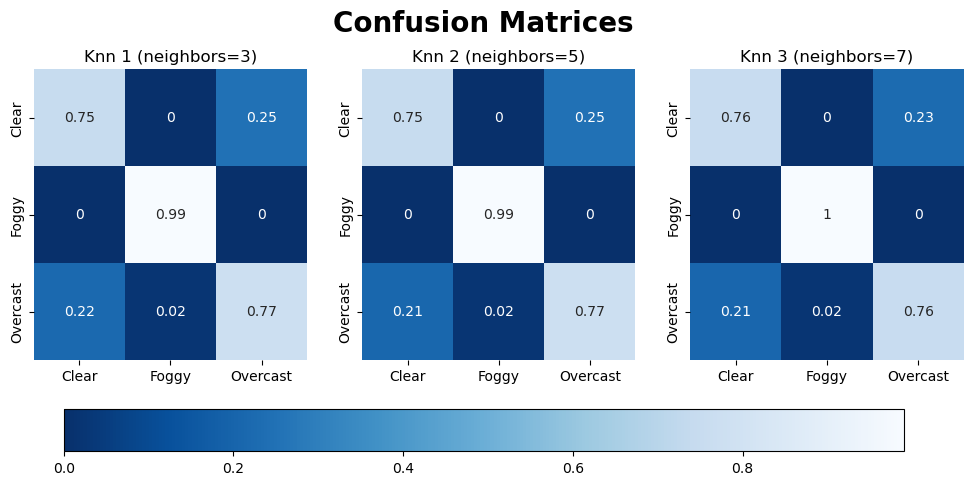

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plt.suptitle('Confusion Matrices', fontsize=20, fontweight='bold', y=1.05)
plt.subplots_adjust(top=0.9)

sns.heatmap(data=conf_mat1.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[0],cmap="Blues_r")
axs[0].set_title('Knn 1 (neighbors=3)')


sns.heatmap(data=conf_mat2.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[1],cmap="Blues_r")
axs[1].set_title('Knn 2 (neighbors=5)')

sns.heatmap(data=conf_mat3.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[2],cmap="Blues_r")
axs[2].set_title('Knn 3 (neighbors=7)')

cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='horizontal', fraction=0.03, pad=0.05)
cbar.ax.set_position([0.15, -0.15, 0.7, 0.2])

plt.show()


In [37]:
knn_data = [knn1_data, knn2_data, knn3_data]
knn_data = (pd.DataFrame(knn_data)*100).round(2)
knn_data.index=["knn1","knn2","knn3"]
knn_data['neighbors']=(knn_data['neighbors']/100).astype(int)
knn_data

neighbors  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score
knn1          3           96.05          80.60      82.42   83.52     82.90
knn2          5           93.73          80.74      82.37   83.68     82.94
knn3          7           92.53          81.05      82.50   84.11     83.18

### Observations and Hyperparameters selection:

from above confusion matrices and performace details of the models we can see that knn3 model has better performance among others and thus we conclude that for knn setting hyperparameter **n_neighbors = 7** gives best performance  



# Logistic Regression

## model 1

In [38]:
%%capture
# Hyperparameter "C"
LReg1=LogisticRegression(penalty="l2"
                        ,solver="saga"
                        ,max_iter=1000
                        ,multi_class="multinomial"
                        ,class_weight="balanced"
                        ,C=0.1
                        
                       )
LReg1.fit(X_train,Y_train)
LReg1_pred = LReg1.predict(X_val)

In [39]:
train_accuracy = LReg1.score(X_train,Y_train)
test_accuracy = LReg1.score(X_val,Y_val)
precision = precision_score(Y_val, LReg1_pred,average='macro')
recall = recall_score(Y_val, LReg1_pred,average='macro')
f1score = f1_score(Y_val, LReg1_pred,average='macro')
LReg1_data= {
    'C':0.1,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}


In [40]:
LReg1_data

{'C': 0.1,
 'Train Accuracy': 0.830998689912325,
 'Test Accuracy': 0.7671925566343042,
 'Precision': 0.7728814535112924,
 'Recall': 0.8090490280615642,
 'F1-Score': 0.7861197816924337}

## model 2

In [41]:
%%capture
# Hyperparameter "C"
LReg2=LogisticRegression(penalty="l2"
                        ,solver="saga"
                        ,max_iter=1000
                        ,multi_class="multinomial"
                        ,class_weight="balanced"
                        ,C=1
                        
                       )
LReg2.fit(X_train,Y_train)
LReg2_pred = LReg2.predict(X_val)

In [42]:
train_accuracy = LReg2.score(X_train,Y_train)
test_accuracy = LReg2.score(X_val,Y_val)
precision = precision_score(Y_val, LReg2_pred,average='macro')
recall = recall_score(Y_val, LReg2_pred,average='macro')
f1score = f1_score(Y_val, LReg2_pred,average='macro')
LReg2_data= {
    'C':1,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [43]:
LReg2_data

{'C': 1,
 'Train Accuracy': 0.8443011186133226,
 'Test Accuracy': 0.7851941747572816,
 'Precision': 0.7999491497291658,
 'Recall': 0.8212069541039707,
 'F1-Score': 0.8085058335346741}

## model 3

In [44]:
%%capture
# Hyperparameter "C"
LReg3=LogisticRegression(penalty="l2"
                        ,solver="saga"
                        ,max_iter=1000
                        ,multi_class="multinomial"
                        ,class_weight="balanced"
                        ,C=10
                        
                       )
LReg3.fit(X_train,Y_train)
LReg3_pred = LReg3.predict(X_val)

In [45]:
train_accuracy = LReg3.score(X_train,Y_train)
test_accuracy = LReg3.score(X_val,Y_val)
precision = precision_score(Y_val, LReg3_pred,average='macro')
recall = recall_score(Y_val, LReg3_pred,average='macro')
f1score = f1_score(Y_val, LReg3_pred,average='macro')
LReg3_data= {
    'C':10,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [46]:
LReg3_data

{'C': 10,
 'Train Accuracy': 0.8496422452887231,
 'Test Accuracy': 0.7934870550161812,
 'Precision': 0.8153233117465875,
 'Recall': 0.826944429614746,
 'F1-Score': 0.8198315340771445}

## model eval

ploting Heatmaps to visualize the confusion matrix inorder to better understand the models performance

In [47]:
conf_mat1=confusion_matrix(Y_val,LReg1_pred,normalize="true")
conf_mat2=confusion_matrix(Y_val,LReg2_pred,normalize="true")
conf_mat3=confusion_matrix(Y_val,LReg3_pred,normalize="true")

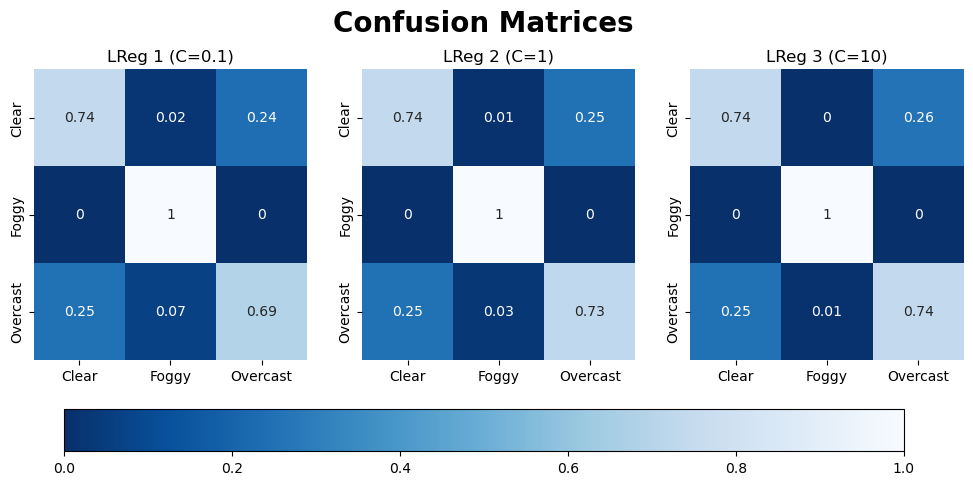

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plt.suptitle('Confusion Matrices', fontsize=20, fontweight='bold', y=1.05)
plt.subplots_adjust(top=0.9)

sns.heatmap(data=conf_mat1.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[0],cmap="Blues_r")
axs[0].set_title('LReg 1 (C=0.1)')


sns.heatmap(data=conf_mat2.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[1],cmap="Blues_r")
axs[1].set_title('LReg 2 (C=1)')

sns.heatmap(data=conf_mat3.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[2],cmap="Blues_r")
axs[2].set_title('LReg 3 (C=10)')

cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='horizontal', fraction=0.03, pad=0.05)
cbar.ax.set_position([0.15, -0.15, 0.7, 0.2])

plt.show()


In [49]:
LReg_data = [LReg1_data,LReg2_data,LReg3_data]
LReg_data = (pd.DataFrame(LReg_data)*100).round(2)
LReg_data.index=["LReg 1","LReg 2","LReg 3"]
LReg_data['C']=(LReg_data['C']/100)
LReg_data

C  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score
LReg 1   0.1           83.10          76.72      77.29   80.90     78.61
LReg 2   1.0           84.43          78.52      79.99   82.12     80.85
LReg 3  10.0           84.96          79.35      81.53   82.69     81.98

### Observations and Hyperparameters selection:

from above confusion matrices and performace details of the models we can see that LReg3 model has better performance among others and thus we conclude that for LReg setting hyperparameter **C = 10** gives best performance  



# Neural network

## model 1

In [50]:
# Hyperparameter "learning_rate"
ann1=MLPClassifier(max_iter=1000,
                  hidden_layer_sizes=(500,),
                  random_state=42,
                  learning_rate_init=0.1
                 )
ann1.fit(X_train,Y_train)
ann1_pred = ann1.predict(X_val)

In [51]:
train_accuracy = ann1.score(X_train,Y_train)
test_accuracy = ann1.score(X_val,Y_val)
precision = precision_score(Y_val, ann1_pred,average='macro')
recall = recall_score(Y_val, ann1_pred,average='macro')
f1score = f1_score(Y_val, ann1_pred,average='macro')
ann1_data= {
    'Learning Rate':0.1,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [52]:
ann1_data

{'Learning Rate': 0.1,
 'Train Accuracy': 0.8692599684235278,
 'Test Accuracy': 0.8205906148867314,
 'Precision': 0.8418029997977987,
 'Recall': 0.838503775101961,
 'F1-Score': 0.8394851301992241}

## model 2

In [53]:
# Hyperparameter "learning_rate"
ann2=MLPClassifier(max_iter=1000,
                  hidden_layer_sizes=(500,),
                  random_state=42,
                  learning_rate_init=0.01
                 )
ann2.fit(X_train,Y_train)
ann2_pred = ann2.predict(X_val)

In [54]:
train_accuracy = ann2.score(X_train,Y_train)
test_accuracy = ann2.score(X_val,Y_val)
precision = precision_score(Y_val, ann2_pred,average='macro')
recall = recall_score(Y_val, ann2_pred,average='macro')
f1score = f1_score(Y_val, ann2_pred,average='macro')
ann2_data= {
    'Learning Rate':0.01,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [55]:
ann2_data

{'Learning Rate': 0.01,
 'Train Accuracy': 0.8836709328496086,
 'Test Accuracy': 0.8228155339805825,
 'Precision': 0.8446744032207518,
 'Recall': 0.8499048472621951,
 'F1-Score': 0.8466696976681177}

## model 3

In [56]:
# Hyperparameter "learning_rate"
ann3=MLPClassifier(max_iter=1000,
                  hidden_layer_sizes=(500,),
                  random_state=42,
                  learning_rate_init=0.001
                 )
ann3.fit(X_train,Y_train)
ann3_pred = ann3.predict(X_val)

In [57]:
train_accuracy = ann3.score(X_train,Y_train)
test_accuracy = ann3.score(X_val,Y_val)
precision = precision_score(Y_val, ann3_pred,average='macro')
recall = recall_score(Y_val, ann3_pred,average='macro')
f1score = f1_score(Y_val, ann3_pred,average='macro')
ann3_data= {
    'Learning Rate':0.001,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [58]:
ann3_data

{'Learning Rate': 0.001,
 'Train Accuracy': 0.8836037488662702,
 'Test Accuracy': 0.8256472491909385,
 'Precision': 0.8469450906348688,
 'Recall': 0.8517156882570899,
 'F1-Score': 0.8488645834562852}

## model eval

In [59]:
conf_mat1=confusion_matrix(Y_val,ann1_pred,normalize="true")
conf_mat2=confusion_matrix(Y_val,ann2_pred,normalize="true")
conf_mat3=confusion_matrix(Y_val,ann3_pred,normalize="true")

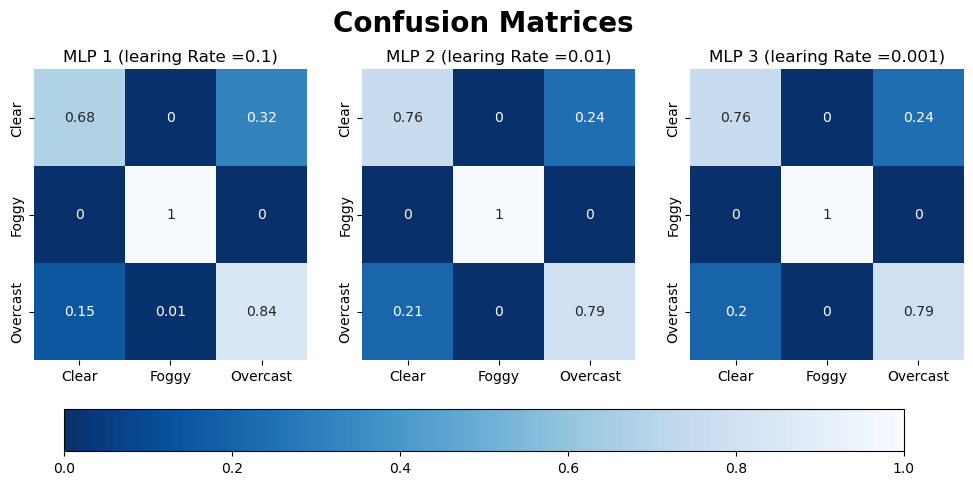

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plt.suptitle('Confusion Matrices', fontsize=20, fontweight='bold', y=1.05)
plt.subplots_adjust(top=0.9)

sns.heatmap(data=conf_mat1.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[0],cmap="Blues_r")
axs[0].set_title('MLP 1 (learing Rate =0.1)')


sns.heatmap(data=conf_mat2.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[1],cmap="Blues_r")
axs[1].set_title('MLP 2 (learing Rate =0.01)')

sns.heatmap(data=conf_mat3.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[2],cmap="Blues_r")
axs[2].set_title('MLP 3 (learing Rate =0.001)')

cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='horizontal', fraction=0.03, pad=0.05)
cbar.ax.set_position([0.15, -0.15, 0.7, 0.2])

plt.show()


In [61]:
ann_data = [ann1_data,ann2_data,ann3_data]
ann_data= (pd.DataFrame(ann_data)*100).round(2)
ann_data.index=["MLP 1","MLP 2","MLP 3"]
ann_data['Learning Rate']=(ann_data['Learning Rate']/100)
ann_data

Learning Rate  Train Accuracy  Test Accuracy  Precision  Recall  \
MLP 1          0.100           86.93          82.06      84.18   83.85   
MLP 2          0.010           88.37          82.28      84.47   84.99   
MLP 3          0.001           88.36          82.56      84.69   85.17   

       F1-Score  
MLP 1     83.95  
MLP 2     84.67  
MLP 3     84.89

### Observations and Hyperparameters selection:

from above confusion matrices and performace details of the models we can see that MLP-3 model has better performance among others and thus we conclude that for MLP setting hyperparameter **Learning rate = 0.001** gives best performance  



## Best Model Selection

for finding the model with best performance we will test the performance of the each of the algorithms with their best hyperparameters of the test set. note that we have previously separated and test set and there for none of the selected models have been previously trained or evaluated of test set

In [62]:
%%capture
#best model among the knn was knn3
knn_pred=knn3.predict(X_test)
test_accuracy = knn3.score(X_test,Y_test)
precision = precision_score(Y_test, knn_pred,average='macro')
recall = recall_score(Y_test, knn_pred,average='macro')
f1score = f1_score(Y_test, knn_pred,average='macro')
knn_data = {
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [63]:
#best model among the LReg was LReg3
LReg_pred = LReg3.predict(X_test)
test_accuracy = LReg3.score(X_test,Y_test)
precision = precision_score(Y_test,LReg_pred,average='macro')
recall = recall_score(Y_test,LReg_pred,average='macro')
f1score = f1_score(Y_test,LReg_pred,average='macro')
LReg_data= {
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}


In [64]:
ann_pred = ann3.predict(X_test)
test_accuracy = ann3.score(X_test,Y_test)
precision = precision_score(Y_test, ann_pred,average='macro')
recall = recall_score(Y_test, ann_pred,average='macro')
f1score = f1_score(Y_test, ann_pred,average='macro')
ann_data= {
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score
}

In [65]:
result = [knn_data,LReg_data,ann_data]
result = (pd.DataFrame(result)*100).round(2)
result.index=["Knn","LReg","MLP"]

In [66]:
conf_mat1=confusion_matrix(Y_test,knn_pred,normalize="true")
conf_mat2=confusion_matrix(Y_test,LReg_pred,normalize="true")
conf_mat3=confusion_matrix(Y_test,ann_pred,normalize="true")

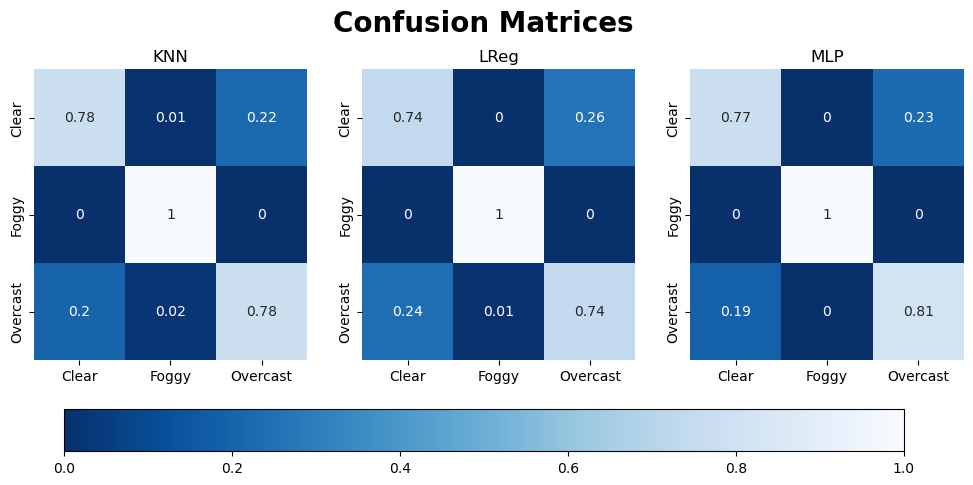

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plt.suptitle('Confusion Matrices', fontsize=20, fontweight='bold', y=1.05)
plt.subplots_adjust(top=0.9)

sns.heatmap(data=conf_mat1.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[0],cmap="Blues_r")
axs[0].set_title('KNN')


sns.heatmap(data=conf_mat2.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[1],cmap="Blues_r")
axs[1].set_title('LReg')

sns.heatmap(data=conf_mat3.round(2),yticklabels=classes,xticklabels=classes,annot=True,cbar=False,ax=axs[2],cmap="Blues_r")
axs[2].set_title('MLP')

cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='horizontal', fraction=0.03, pad=0.05)
cbar.ax.set_position([0.15, -0.15, 0.7, 0.2])

plt.show()


In [68]:
result

Test Accuracy  Precision  Recall  F1-Score
Knn           82.24      83.61   85.02     84.22
LReg          79.53      81.62   82.79     82.08
MLP           83.35      85.37   85.76     85.54

### best model: 

By analysing above confusion matrices and perfromance results we can conclude that neural network **( Multi Layer Perceptron )** with hyperparameter **learning rate = 0.001** performs best among all the other models 

## Comparing results of all the models

In [69]:
comparision=[knn1_data, knn2_data, knn3_data,LReg1_data,LReg2_data,LReg3_data,ann1_data,ann2_data,ann3_data]
comparision=pd.DataFrame(comparision)
comparision.index=["knn1", "knn2", "knn3","LReg1","LReg2","LReg3","ann1","ann2","ann3"]

In [70]:
comparision.drop(["neighbors","C","Learning Rate"],axis=1,inplace=True)
comparision=comparision.T

In [71]:
comparision

knn1      knn2      knn3     LReg1     LReg2     LReg3  \
Train Accuracy  0.960496  0.937284  0.925291  0.830999  0.844301  0.849642   
Test Accuracy   0.806028  0.807443  0.810477  0.767193  0.785194  0.793487   
Precision       0.824203  0.823656  0.825018  0.772881  0.799949  0.815323   
Recall          0.835212  0.836784  0.841133  0.809049  0.821207  0.826944   
F1-Score        0.828955  0.829362  0.831847  0.786120  0.808506  0.819832   

                    ann1      ann2      ann3  
Train Accuracy  0.869260  0.883671  0.883604  
Test Accuracy   0.820591  0.822816  0.825647  
Precision       0.841803  0.844674  0.846945  
Recall          0.838504  0.849905  0.851716  
F1-Score        0.839485  0.846670  0.848865

## User Interface for interaction

creating a simple user interface for interaction and testing model predictions against random data values

In [72]:
from IPython.display import display, HTML
import ipywidgets as widgets

# Loading the trained models
models = {
    'KNN 1': knn1,
    'KNN 2': knn2,
    'KNN 3': knn3,
    'LReg 1': LReg1,
    'LReg 2': LReg2,
    'LReg 3': LReg3,
    'MLP 1': ann1,
    'MLP 2': ann2,
    'MLP 3': ann3,
}
# dropdown menu for model selection
model_dropdown = widgets.Dropdown(options=list(models.keys()), description='Select Model:')

# entry boxes for feature inputs
temperature_box = widgets.FloatText(description='Temperature:')
humidity_box = widgets.FloatText(description='Humidity:')
wind_speed_box = widgets.FloatText(description='Wind Speed:')
visibility_box = widgets.FloatText(description='Visibility:')

# output area for displaying the result
output_area = widgets.Output()

# button for prediction
predict_button = widgets.Button(description='Predict')

# Define the callback function for prediction
def predict_button_clicked(b):
    with output_area:
        # Clear previous output
        output_area.clear_output()

        model_name = model_dropdown.value
        temperature = temperature_box.value
        humidity = humidity_box.value
        visibility = visibility_box.value
        wind_speed = wind_speed_box.value

        selected_model = models[model_name]
        prediction = selected_model.predict([[temperature,humidity,wind_speed,visibility]])[0]

        html = f'''
        <h3>Model: {model_name}</h2>
        <h3>Input Values:</h3>
        <ul>
            <li>Temperature: {temperature}</li>
            <li>Humidity: {humidity}</li>
            <li>Wind Speed: {wind_speed}</li>
            <li>Visibility: {visibility}</li>
        </ul>
        <h3>Prediction:</h3>
        <p>{prediction}</p>
        '''
        # Display the HTML representation
        display(HTML(html))

# Attaching the callback function to the button
predict_button.on_click(predict_button_clicked)

# Displaying the interface
display(model_dropdown, temperature_box, humidity_box, visibility_box, wind_speed_box, predict_button, output_area)


Dropdown(description='Select Model:', options=('KNN 1', 'KNN 2', 'KNN 3', 'LReg 1', 'LReg 2', 'LReg 3', 'MLP 1…

FloatText(value=0.0, description='Temperature:')

FloatText(value=0.0, description='Humidity:')

FloatText(value=0.0, description='Visibility:')

FloatText(value=0.0, description='Wind Speed:')

Button(description='Predict', style=ButtonStyle())

Output()

In [73]:
# Overcast 
# temp=13.772222
# humid=0.60
# windspeed=17.0982
# visib=15.8263

In [74]:
# Clear	15.011111	0.93	3.2039	15.8263
# temp=15.011111
# humid=0.93
# windspeed=3.2039
# visib=15.8263

In [75]:
# Foggy	6.627778	0.96	3.3005	2.9302
# temp=6.627778
# humid=0.96
# windspeed=3.3005
# visib=2.9302

In [76]:
import joblib


In [77]:
# !pip list


Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [78]:
joblib.dump(ann3, 'weather_model.pkl')

['weather_model.pkl']